In [1]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(
    1, '/Users/haas/Documents/Masters/MachineLearning/FYS-STK4155/project3'
)

import random

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from activation_functions import *
from FFNN import FFNN

# import accuracy score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    mean_squared_error,
)
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from utils import *

cmt = 1 / 2.54
sns.set_palette('pastel')

## Training Regression

Epoch 1/1000
32/32 [==============================] - 1s 19ms/step - loss: 4.3005 - mse: 0.9706 - val_loss: 3.4130 - val_mse: 0.1412
Epoch 2/1000
32/32 [==============================] - 0s 15ms/step - loss: 3.2701 - mse: 0.0562 - val_loss: 3.1965 - val_mse: 0.0469
Epoch 3/1000
32/32 [==============================] - 0s 13ms/step - loss: 3.1279 - mse: 0.0376 - val_loss: 3.0696 - val_mse: 0.0438
Epoch 4/1000
32/32 [==============================] - 0s 15ms/step - loss: 3.0026 - mse: 0.0349 - val_loss: 2.9459 - val_mse: 0.0408
Epoch 5/1000
32/32 [==============================] - 0s 15ms/step - loss: 2.8822 - mse: 0.0330 - val_loss: 2.8293 - val_mse: 0.0403
Epoch 6/1000
32/32 [==============================] - 0s 14ms/step - loss: 2.7667 - mse: 0.0313 - val_loss: 2.7165 - val_mse: 0.0386
Epoch 7/1000
32/32 [==============================] - 0s 14ms/step - loss: 2.6566 - mse: 0.0298 - val_loss: 2.6093 - val_mse: 0.0372
Epoch 8/1000
32/32 [==============================] - 0s 15ms/step - 

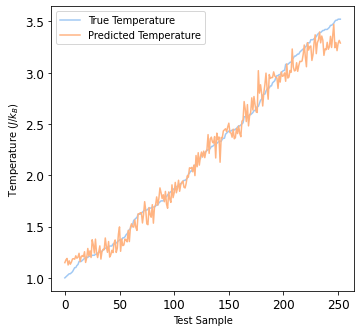

In [3]:
# lenet inspired model
# now we replicate LeNet-5
Xtrain, Xtest, ytrain, ytest = Ising.load_data()
# first reshape Xtrain and Xtest to 4D arrays
Xtrain = Xtrain.reshape(Xtrain.shape[0], 50, 50, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 50, 50, 1)
# create model
model1 = Sequential()
# add model layers
eta = 1e-4
l2 = 0.01
l2_reg = regularizers.l2(l2)
epochs = 1000
model1.add(
    Conv2D(
        6,
        kernel_size=5,
        activation='leaky_relu',
        input_shape=(50, 50, 1),
        kernel_regularizer=l2_reg,
        padding='same',
    )
)
# model.add(AveragePooling2D(pool_size=(4, 4)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(
    Conv2D(
        16,
        kernel_size=5,
        activation='leaky_relu',
        kernel_regularizer=l2_reg,
        padding='same',
    )
)
model1.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(AveragePooling2D(pool_size=(4, 4)))
model1.add(Flatten())
model1.add(Dense(120, activation='relu', kernel_regularizer=l2_reg))
model1.add(Dense(84, activation='relu', kernel_regularizer=l2_reg))
model1.add(Dense(1, activation='linear'))
# compile model using accuracy to measure model performance
sgd = SGD(learning_rate=eta, decay=5e-6, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=eta, beta_1=0.9, beta_2=0.999, amsgrad=False)

model1.compile(optimizer=adam, loss='mse', metrics='mse')
# train the model
history1 = model1.fit(
    Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=epochs
)   #### change this
#
# evaluate the model
pred1 = model1.predict(Xtest)
order = np.argsort(ytest.ravel())
ytest = ytest[order]
pred1 = pred1[order]

# plot predictions
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(13 * cmt, 12 * cmt))
plt.plot(ytest, label='True Temperature')
plt.plot(pred1, label='Predicted Temperature')
plt.legend()
plt.xlabel('Test Sample')
plt.ylabel('Temperature $(J/k_B)$')
# change ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


info = (
    f'_l2reg{str(l2).replace(".", "")}'
    + '_eta'
    + str(eta).replace('.', '')
    + f'_epoch{str(epochs)}'
)
plt.tight_layout()
plt.savefig('../figs/TF_CNN' + info + '.pdf')


print('RMSE1: ', mean_squared_error(ytest, pred1, squared=False))
rmse1 = np.sqrt(mean_squared_error(pred1, ytest.ravel())) / np.mean(ytest)
print('rmse over average of ytest with LeNet-5 = ', rmse1)


### Parsing Ahmed text file to try to predict temp

In [21]:
data = pd.read_csv("../data/50/Simulation Results_Dim50_Temp1.50_Field0.0_SweepNum10000.txt", header=None, sep="\t")
X = data.to_numpy()
X = X.reshape(1, 50, 50, 1)

print("Predicted temperature: ", model1.predict(X)[0][0], " (J/k_B)")

1/1 [==============================] - 0s 18ms/step
Predicted temperature:  1.4377586  (J/k_B)
